<a href="https://colab.research.google.com/github/treep1/Keras-Deep-learning/blob/master/IMDB_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDB dataset & CNN
##IMDB
IMDB는 Internet Movie DataBase, 즉 영화리뷰 데이터를 말한다. 총 5만개의 리뷰로 이루어져 있고,  훈련 데이터와 검증데이터를 각각 25000개씩 나누어있고, 각각 50대50의 긍정리뷰와 부정리뷰를 가지고 있다.
##CNN (Conventional Neural Networks)
일반신경망과 비슷한 구조를 가지고 있지만, 입력데이터가 이미지라는 가정하에 수행되므로, 이미지 데이터를 인코딩할 수 있다. ConvNet의 각 레이어는 미분가능한 변환함수를 통해 하나의 Activation Volume을 또다른 Activation Volume으로 변환 시켜준다. 크게 Convolution layer, Pooling layer, Fully-Connected layer -> 3개의 레이어가 사용된다.

픽셀값으로 이루어진 원본이미지를 각 레이어를 거치며 클래스 점수로 변환한다.


그리고 어떤 레이어는 parameter들을 가지고 있지만, 또 어떤 레이어는 parameter 값을 가지고 있지 않다.


In [19]:
%matplotlib inline
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import LSTM
from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np

Using Keras version: 2.2.4 backend: tensorflow


In [0]:
imdb = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen = 200)
x_val = sequence.pad_sequences(x_val, maxlen = 200)
x_test = sequence.pad_sequences(x_test, maxlen = 200)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import Dense

model = Sequential()
model.add (Embedding(20000, 128 ))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding = 'valid', activation = 'relu', strides =1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

##Embedding
범주형 자료를 연속적 벡터 형태로 변환시키는 함수

단어를 n차원의 벡터에 매핑해준다.

##Dropout

망의 크기가 커질 경우, Overfitting의 문제를 피하기 위해서, 망에 있는 모든 레이어에 대해 학습을 수행하는 것이 아닌, 같은 망에 있는 입력 레이어나 히든레이어의 일부 뉴런을 생략하고 줄인 신경망으로 학습이 수월하게 해준다. 

##Conv1D
합성곱(Convolution) 연산을 수행하는 역할을 한다. 

1차원 상에서 CNN의 중요 레이어중 하나인 Convolutional 레이어의 연산을 수행해준다.

##GlobalMaxPooling1D

Pooling이란, Convolution을 거쳐서 나온 Activation maps가 있을 때, 이를 이루는 Convolution 레이어를 resizing 하여 새로운 레이어를 얻는 과정이다.
MaxPooling은 최댓값을 뽑아내는 것을 의미한다.


In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, epochs = 25, batch_size = 64, validation_data = (x_val, y_val))

W0804 20:22:06.079151 140698910189440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 20:22:06.153527 140698910189440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0804 20:22:06.177859 140698910189440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 149s 7ms/step - loss: 0.4514 - acc: 0.7703 - val_loss: 0.2899 - val_acc: 0.8752
Epoch 2/25
20000/20000 [==============================] - 146s 7ms/step - loss: 0.2119 - acc: 0.9184 - val_loss: 0.2671 - val_acc: 0.8898
Epoch 3/25
20000/20000 [==============================] - 151s 8ms/step - loss: 0.0817 - acc: 0.9735 - val_loss: 0.2948 - val_acc: 0.8898
Epoch 4/25
20000/20000 [==============================] - 147s 7ms/step - loss: 0.0203 - acc: 0.9958 - val_loss: 0.3683 - val_acc: 0.8906
Epoch 5/25
20000/20000 [==============================] - 147s 7ms/step - loss: 0.0054 - acc: 0.9993 - val_loss: 0.4024 - val_acc: 0.8898
Epoch 6/25
20000/20000 [==============================] - 156s 8ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.4609 - val_acc: 0.8874
Epoch 7/25
20000/20000 [==============================] - 148s 7ms/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.4688 - v

In [20]:
result = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 65s 3ms/step


In [28]:
print("Loss")
print(result[0])
print("accuracy")
print(result[1])

Loss
0.8828269399294629
accuracy
0.86992


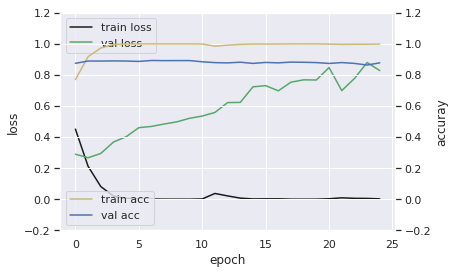

In [33]:


fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'k', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'y', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'b', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Text(408.875, 0.5, 'accuray')